In [6]:
#ładowanie bibliotek

import os
import cv2
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from random import randint
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Perceptron

In [12]:
#definicja stałych
PATH = r'D:/kursy/uczenie maszynowe w Pythonie Podstawy perceptron, regresja/sekcja 5/projekt/four-shapes/shapes/'
IMG_SIZE = 64
shapes = ["circle", "square", "triangle", "star"]
labels = []
dataset = []

In [13]:
#pętla wczytująca dane
for shape in shapes:
    print("Getting data for: ", shape)
    #iterate through each file in the folder
    for path in os.listdir(PATH + shape):
        #add the image to the list of images
        image = cv2.imread(PATH + shape + '/' + path)
        image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))
        image = image.reshape(12288)
        dataset.append(image)
        labels.append(shapes.index(shape))

Getting data for:  circle
Getting data for:  square
Getting data for:  triangle
Getting data for:  star


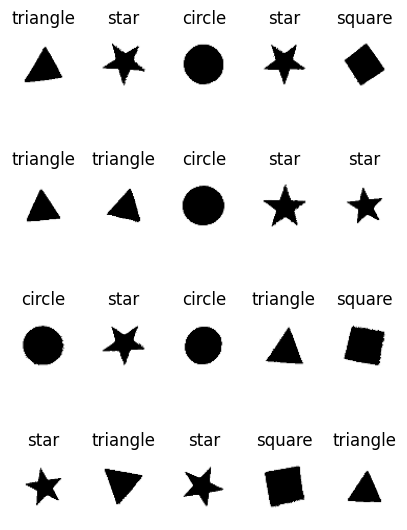

In [14]:
#zobaczymy kilka obrazków
index = np.random.randint(0, len(dataset) - 1, size= 20)
plt.figure(figsize=(5,7))
 
for i, ind in enumerate(index, 1):
    img = dataset[ind].reshape((64, 64, 3))
    lab = shapes[labels[ind]]
    plt.subplot(4, 5, i)
    plt.title(lab)
    plt.axis('off')
    plt.imshow(img)

In [16]:
#konwertujemy do postaci array
X = np.array(dataset)
X.shape
 
y=np.array(labels)
y.shape

(14970,)

In [17]:
#dzielimy na zbór treningowy i testowy
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [18]:
#tworzymy obiekt perceptronu wykorzystująć 100 epok tak aby w każdej były mieszane

clf = Perceptron(max_iter=100, shuffle=True)

In [19]:
#uczymy perceptron na danych uczących
clf.fit(X_train, y_train)

Perceptron(max_iter=100)

In [20]:
#oceniamy wynik
clf.score(X_test, y_test)

0.9916499665998664

In [22]:
#Korzystając z poniższego polecenia zbieramy wszystkie niepoprawne wyniki
y_pred = clf.predict(X_test)
bad_results = [(a,b,c) for (a,b,c) in zip(X_test[y_test != y_pred], 
                                          y_test[y_test != y_pred],
                                          y_pred[y_test != y_pred] )]
len(bad_results)

25

C:\Users\macie\AppData\Local\Temp\ipykernel_16968\14750455.py:7: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(20,20))


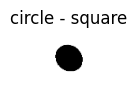

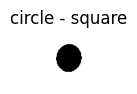

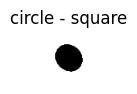

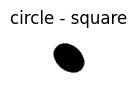

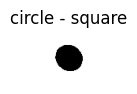

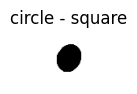

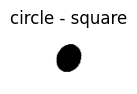

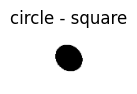

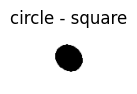

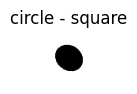

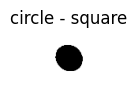

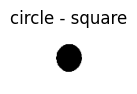

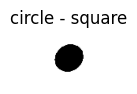

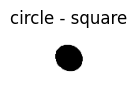

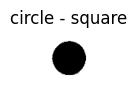

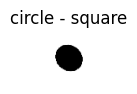

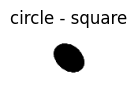

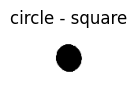

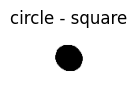

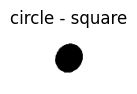

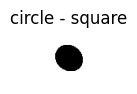

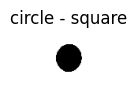

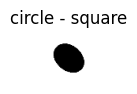

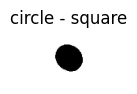

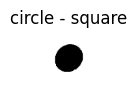

In [23]:
#rysujemy kształty które są źle rozpoznane
i=1
for x_test, y_test, y_pred in bad_results:
    img = x_test.reshape((64, 64, 3))
    label_test = shapes[y_test]
    label_pred = shapes[y_pred]
    plt.figure(figsize=(20,20))
    plt.subplot(len(bad_results), 1, i)
    plt.title(label_test +' - '+ label_pred)
    plt.axis('off')
    plt.imshow(img)
    i+=1

